In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
log_dirs = [
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/USAFlu',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/SouthChinaFlu',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaFlu',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/Weekly',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/PositiveRate',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaILI',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/SouthChinaILI'
]

# 定义正则表达式来匹配所需的数据
pattern = re.compile(
    r'seq_len:\s*(\d+)\s*if_inverse:\s*(\d+).*?'
    r'spearmanR:\s*([\d\.-]+).*?pearsonR:\s*([\d\.-]+).*?'
    r'mae:\s*([\d\.-]+).*?mse:\s*([\d\.-]+).*?mape:\s*([\d\.-]+).*?smape:\s*([\d\.-]+)',
    re.DOTALL
)

data = {
    'foldername': [],
    'filename': [],
    'seq_len': [],
    'if_inverse': [],
    'spearmanR': [],
    'pearsonR': [],
    'mae': [],
    'mse': [],
    'mape': [],
    'smape': []
}

# 遍历每个路径中的所有指定文件
for log_dir in log_dirs:
    for filename in os.listdir(log_dir):
        if filename.endswith('pred_8_layer6.log'):
            filepath = os.path.join(log_dir, filename)
            foldername = os.path.basename(log_dir)
            with open(filepath, 'r') as file:
                content = file.read()
                matches = pattern.findall(content)
                if matches:
                    for match in matches:
                        data['foldername'].append(foldername)
                        data['filename'].append(filename)
                        data['seq_len'].append(int(match[0]))
                        data['if_inverse'].append(int(match[1]))
                        data['spearmanR'].append(float(match[2]))
                        data['pearsonR'].append(float(match[3]))
                        data['mae'].append(float(match[4]))
                        data['mse'].append(float(match[5]))
                        data['mape'].append(float(match[6]))
                        data['smape'].append(float(match[7]))
                else:
                    print(f"No matches found in file: {foldername}/{filename}")
            print(f"Parsed {len(matches)} groups from file: {foldername}/{filename}")

df = pd.DataFrame(data)

# 检查是否正确读取所有数据
print(f"Total parsed rows: {len(df)}")
# print(df.head())

output_file = 'summary_lr4_predlen8_GPT.xlsx'
df.to_excel(output_file, index=False)

print(f"数据已输出到: {output_file}")


Parsed 6 groups from file: USAFlu/GPT_relu_pred_8_layer6.log
Parsed 6 groups from file: SouthChinaFlu/GPT_relu_pred_8_layer6.log
Parsed 6 groups from file: NorthChinaFlu/GPT_relu_pred_8_layer6.log
Parsed 6 groups from file: Weekly/GPT_relu_pred_8_layer6.log
Parsed 6 groups from file: PositiveRate/GPT_relu_pred_8_layer6.log
Parsed 6 groups from file: NorthChinaILI/GPT_relu_pred_8_layer6.log
Parsed 6 groups from file: SouthChinaILI/GPT_relu_pred_8_layer6.log
Total parsed rows: 42
数据已输出到: summary_lr4_predlen8_GPT.xlsx


In [3]:
## NoTrain
log_dirs = [
    # '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/USAFlu',
    # '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/SouthChinaFlu',
    # '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaFlu',
    # '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/Weekly',
    # '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/PositiveRate',
    # '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaILI',
    # '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/SouthChinaILI',
    '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/Result_no_train'
]

pattern = re.compile(
    r'seq_len:\s*(\d+)\s*if_inverse:\s*(\d+).*?'
    r'spearmanR:\s*([\d\.-]+).*?pearsonR:\s*([\d\.-]+).*?'
    r'mae:\s*([\d\.-]+).*?mse:\s*([\d\.-]+).*?mape:\s*([\d\.-]+).*?smape:\s*([\d\.-]+)',
    re.DOTALL
)

data = {
    'foldername': [],
    'filename': [],
    'seq_len': [],
    'if_inverse': [],
    'spearmanR': [],
    'pearsonR': [],
    'mae': [],
    'mse': [],
    'mape': [],
    'smape': []
}

# 遍历每个路径中的所有指定文件
for log_dir in log_dirs:
    for filename in os.listdir(log_dir):
        if filename.startswith('PatchTST'):
            filepath = os.path.join(log_dir, filename)
            foldername = os.path.basename(log_dir)
            with open(filepath, 'r') as file:
                content = file.read()
                matches = pattern.findall(content)
                if matches:
                    for match in matches:
                        data['foldername'].append(foldername)
                        data['filename'].append(filename)
                        data['seq_len'].append(int(match[0]))
                        data['if_inverse'].append(int(match[1]))
                        data['spearmanR'].append(float(match[2]))
                        data['pearsonR'].append(float(match[3]))
                        data['mae'].append(float(match[4]))
                        data['mse'].append(float(match[5]))
                        data['mape'].append(float(match[6]))
                        data['smape'].append(float(match[7]))
                else:
                    print(f"No matches found in file: {foldername}/{filename}")
            print(f"Parsed {len(matches)} groups from file: {foldername}/{filename}")

df = pd.DataFrame(data)

# 检查是否正确读取所有数据
print(f"Total parsed rows: {len(df)}")
# print(df.head())

output_file = 'summary_patchtst_no_train_relu.xlsx'
df.to_excel(output_file, index=False)

print(f"数据已输出到: {output_file}")


Parsed 6 groups from file: Result_no_train/PatchTST_ili_south.log
Parsed 6 groups from file: Result_no_train/PatchTST_positive_rate.log
Parsed 6 groups from file: Result_no_train/PatchTST_ili_north.log
Parsed 6 groups from file: Result_no_train/PatchTST_ili_cq.log
Parsed 6 groups from file: Result_no_train/PatchTST_flu_north.log
Parsed 6 groups from file: Result_no_train/PatchTST_flu_usa.log
Parsed 6 groups from file: Result_no_train/PatchTST_flu_south.log
Total parsed rows: 42
数据已输出到: summary_patchtst_no_train_relu.xlsx


In [4]:
import os
import re
import pandas as pd

# 定义log目录路径
# log_dir = '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaFlu'
log_dir = '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/SouthChinaFlu'

# 定义正则表达式来匹配所需的数据
pattern = re.compile(
    r'seq_len:\s*(\d+)\s*if_inverse:\s*(\d+).*?'
    r'spearmanR:\s*([\d\.-]+).*?pearsonR:\s*([\d\.-]+).*?'
    r'mae:\s*([\d\.-]+).*?mse:\s*([\d\.-]+).*?mape:\s*([\d\.-]+).*?smape:\s*([\d\.-]+)',
    re.DOTALL
)

# 初始化数据字典
data = {
    'foldername': [],
    'filename': [],
    'seq_len': [],
    'if_inverse': [],
    'spearmanR': [],
    'pearsonR': [],
    'mae': [],
    'mse': [],
    'mape': [],
    'smape': []
}

name = 'relu'

# 遍历每个路径中的所有.log文件
for filename in os.listdir(log_dir):
    if filename.endswith(f'{name}.log') and filename.startswith('Llama3'):
        filepath = os.path.join(log_dir, filename)
        foldername = os.path.basename(log_dir)  # 文件夹名称

        # 读取文件并提取数据
        with open(filepath, 'r') as file:
            content = file.read()
            matches = pattern.findall(content)
            if matches:
                for match in matches:
                    data['foldername'].append(foldername)
                    data['filename'].append(filename)
                    data['seq_len'].append(int(match[0]))
                    data['if_inverse'].append(int(match[1]))
                    data['spearmanR'].append(float(match[2]))
                    data['pearsonR'].append(float(match[3]))
                    data['mae'].append(float(match[4]))
                    data['mse'].append(float(match[5]))
                    data['mape'].append(float(match[6]))
                    data['smape'].append(float(match[7]))
            else:
                print(f"No matches found in file: {foldername}/{filename}")
        
        print(f"Parsed {len(matches)} groups from file: {foldername}/{filename}")

df = pd.DataFrame(data)

# 选择数值列，排除非数值列
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 计算if_inverse = 0 和 if_inverse = 1 的均值
mean_if_inverse_0 = df[df['if_inverse'] == 0][numeric_columns].mean()
mean_if_inverse_1 = df[df['if_inverse'] == 1][numeric_columns].mean()

mean_if_inverse_0['foldername'] = 'Mean0'
mean_if_inverse_0['filename'] = 'Mean0'
mean_if_inverse_1['foldername'] = 'Mean1'
mean_if_inverse_1['filename'] = 'Mean1'

mean_if_inverse_0 = pd.DataFrame([mean_if_inverse_0])
mean_if_inverse_1 = pd.DataFrame([mean_if_inverse_1])

df = pd.concat([df, mean_if_inverse_0, mean_if_inverse_1], ignore_index=True)

output_file = f'summary_{name}_south_Llama3.xlsx'
df.to_excel(output_file, index=False)

print(f"详细数据已输出到 {output_file}")


Parsed 6 groups from file: SouthChinaFlu/Llama3_relu.log
详细数据已输出到 summary_relu_south_Llama3.xlsx


In [11]:
df['name'] = df['foldername'] + '/' + df['filename']
df.drop(columns=['foldername', 'filename'], inplace=True)

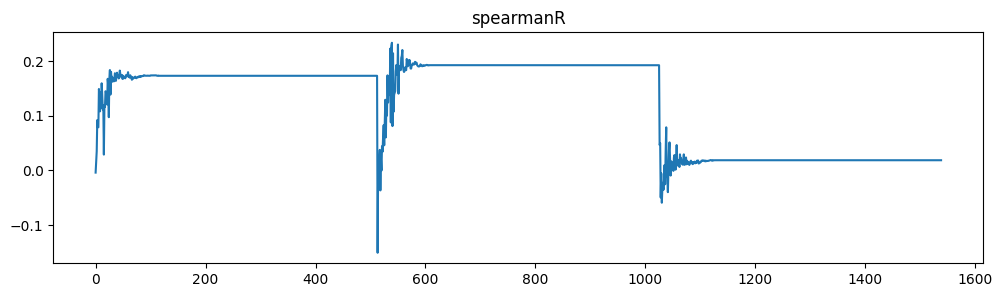

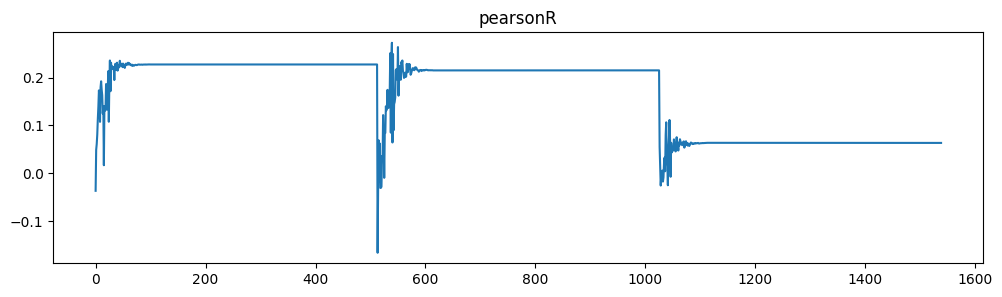

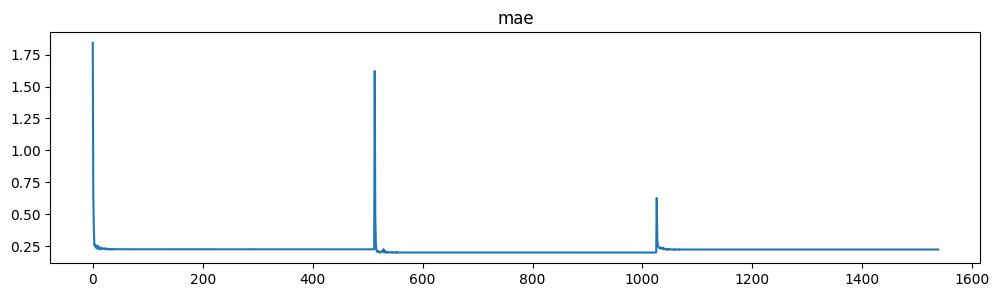

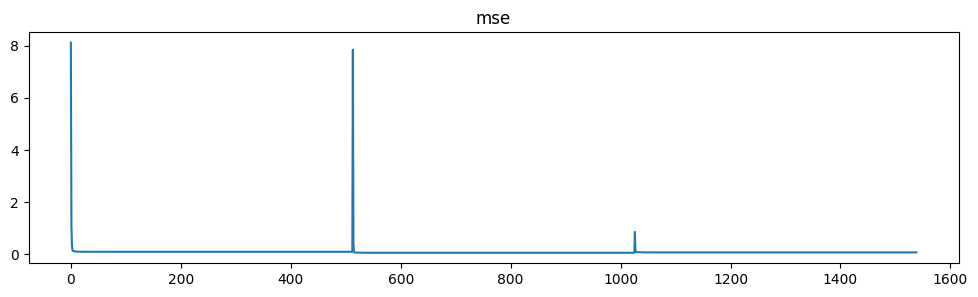

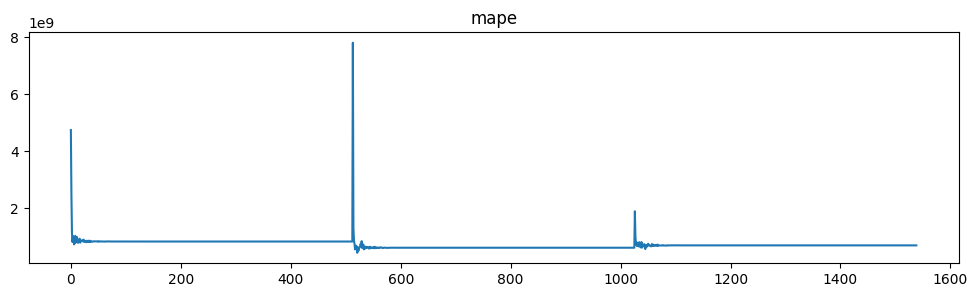

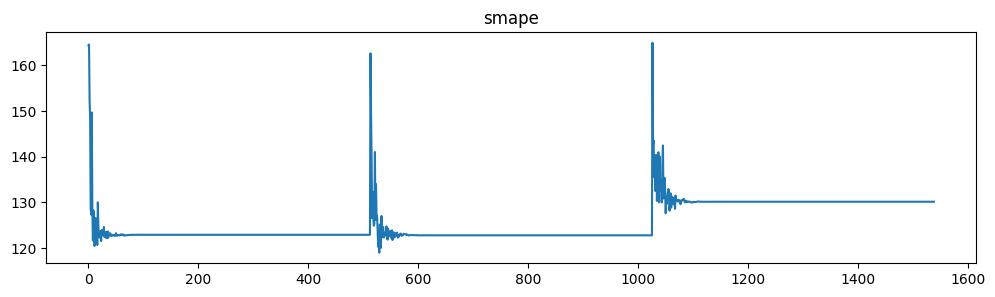

In [27]:
plt.figure(figsize=(12,3))
plt.plot(df.spearmanR)
plt.title('spearmanR')
plt.show()
plt.figure(figsize=(12,3))
plt.plot(df.pearsonR)
plt.title('pearsonR')
plt.show()
plt.figure(figsize=(12,3))
plt.plot(df.mae)
plt.title('mae')
plt.show()
plt.figure(figsize=(12,3))
plt.plot(df.mse)
plt.title('mse')
plt.show()
plt.figure(figsize=(12,3))
plt.plot(df.mape)
plt.title('mape')
plt.show()
plt.figure(figsize=(12,3))
plt.plot(df.smape)
plt.title('smape')
plt.show()

In [ ]:
import pandas as pd
import os
import re

# 输入和输出文件路径
input_path = '/data_disk/lichx/GPT4/diff_with_space/loss/baseline_transformer_13.txt'
output_path = '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/summary_transformer_13.csv'

# 创建存储数据的列表
data = []

# 读取文本文件并提取数据
with open(input_path, 'r') as file:
    lines = file.readlines()
    dataset_name = ""
    for line in lines:
        # 提取数据集名称
        if re.match(r"^\s*\w+", line):
            dataset_name = line.strip()
        # 提取Diff数据
        elif 'Diff:' in line:
            data_type = 'Diff'
            metrics = eval(line.split(':', 1)[1].strip())
            data.append([dataset_name, data_type, metrics['corr_p'], metrics['corr_s'], metrics['mae'], metrics['mse'], metrics['mape'], metrics['smape']])
        # 提取Inverse数据
        elif 'Inverse:' in line:
            data_type = 'Inverse'
            metrics = eval(line.split(':', 1)[1].strip())
            data.append([dataset_name, data_type, metrics['corr_p'], metrics['corr_s'], metrics['mae'], metrics['mse'], metrics['mape'], metrics['smape']])

# 创建DataFrame
df = pd.DataFrame(data, columns=['Dataset', 'Type', 'corr_p', 'corr_s', 'mae', 'mse', 'mape', 'smape'])

# 检查并创建输出目录
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# 保存为CSV文件
df.to_csv(output_path, index=False)

print(f"文件已保存到 {output_path}")


Raw 部分 (ILI_NorthChina):
PearsonR: 0.2326459758160499
PearsonS: 0.2743182187929691
MAE: 3753.89794921875
MSE: 33511158.0
MAPE: 100.75496673583984
SMAPE: 198.3651580810547

Inverse 部分 (ILI_NorthChina):
PearsonR: 0.95589419979393

Raw 部分 (ILI_SouthChina):
PearsonR: -0.0732301357919638
PearsonS: -0.007619327484152638
MAE: 6407.76416015625
MSE: 128941880.0
MAPE: 101.16204833984375
SMAPE: 197.6102752685547

Inverse 部分 (ILI_SouthChina):
PearsonR: 0.95589419979393

Raw 部分 (USA):
PearsonR: 0.6182865430994579
PearsonS: 0.5900465975399857
MAE: 1.0449018478393555
MSE: 2.3216469287872314
MAPE: 250.72665405273438
SMAPE: 124.12335205078125

Inverse 部分 (USA):
PearsonR: 0.95589419979393

Raw 部分 (Weekly):
PearsonR: 0.17512600427427238
PearsonS: 0.14416170623312508
MAE: 45.22810363769531
MSE: 4632.58740234375
MAPE: 515347808.0
SMAPE: 160.66493225097656

Inverse 部分 (Weekly):
PearsonR: 0.95589419979393

Raw 部分 (NorthChina):
PearsonR: 0.2326459758160499
PearsonS: 0.2743182187929691
MAE: 3753.89794921875
MS

In [ ]:
## llama
import re
import pandas as pd

# 定义日志文件的路径
log_file = '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaFlu/Llama2_layer_21_to_31_relu_lr4_no_fc_scale_11_28.log'

# 定义正则表达式来匹配所需的数据
pattern = re.compile(
    r'seq_len:\s*(\d+)\s*if_inverse:\s*(\d+).*?'
    r'spearmanR:\s*([\d\.-]+).*?pearsonR:\s*([\d\.-]+).*?'
    r'mae:\s*([\d\.-]+).*?mse:\s*([\d\.-]+).*?mape:\s*([\d\.-]+).*?smape:\s*([\d\.-]+)', 
    re.DOTALL
)

# 用于提取 llama_layer 标签的正则表达式
llama_pattern = re.compile(r'llama_layer:\s*(\d+)')

# 初始化数据字典
data = {
    'foldername': [],
    'filename': [],
    'seq_len': [],
    'if_inverse': [],
    'spearmanR': [],
    'pearsonR': [],
    'mae': [],
    'mse': [],
    'mape': [],
    'smape': [],
    'llama_layer': []  # 新增列
}

# 提取 llama_layer 信息
llama_layers = []
with open(log_file, 'r') as file:
    content = file.read()
    llama_layers = llama_pattern.findall(content)

# 读取并提取其他指标数据
with open(log_file, 'r') as file:
    content = file.read()
    matches = pattern.findall(content)

    if matches:
        llama_layer_index = 0  # 用于控制 llama_layer 标签的更新
        llama_layer_count = 0  # 用于记录已经处理了多少个 llama_layer

        for i, match in enumerate(matches):
            # 每 6 组数据对应一个 llama_layer
            if i % 6 == 0 and llama_layer_count < len(llama_layers):
                gpt_layer = int(llama_layers[llama_layer_count])
                llama_layer_count += 1
            else:
                gpt_layer = gpt_layer  # 使用当前的 llama_layer

            # 更新数据字典
            data['foldername'].append('NorthChinaFlu')  # 这里你可以修改为适合的文件夹名称
            data['filename'].append(log_file)  # 文件路径
            data['seq_len'].append(int(match[0]))
            data['if_inverse'].append(int(match[1]))
            data['spearmanR'].append(float(match[2]))
            data['pearsonR'].append(float(match[3]))
            data['mae'].append(float(match[4]))
            data['mse'].append(float(match[5]))
            data['mape'].append(float(match[6]))
            data['smape'].append(float(match[7]))
            data['llama_layer'].append(gpt_layer)

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 检查是否正确读取所有数据
print(f"Total parsed rows: {len(df)}")
# print(df.head())

# 输出到Excel文件
output_file = 'summary_epochs_with_llama_layer_values_3.xlsx'
df.to_excel(output_file, index=False)

print(f"详细数据已输出到 {output_file}")


In [3]:
## gpt
import re
import pandas as pd

# 定义日志文件的路径
log_file = '/data_disk/lichx/NeurIPS2023-One-Fits-All/Long-term_Forecasting/Output/NorthChinaFlu/GPT_layer_1_to_12_12_2.log'

# 定义正则表达式来匹配所需的数据
pattern = re.compile(
    r'seq_len:\s*(\d+)\s*if_inverse:\s*(\d+).*?'
    r'spearmanR:\s*([\d\.-]+).*?pearsonR:\s*([\d\.-]+).*?'
    r'mae:\s*([\d\.-]+).*?mse:\s*([\d\.-]+).*?mape:\s*([\d\.-]+).*?smape:\s*([\d\.-]+)', 
    re.DOTALL
)

# 用于提取 llama_layer 标签的正则表达式
llama_pattern = re.compile(r'gpt_layer:\s*(\d+)')

# 初始化数据字典
data = {
    'foldername': [],
    'filename': [],
    'seq_len': [],
    'if_inverse': [],
    'spearmanR': [],
    'pearsonR': [],
    'mae': [],
    'mse': [],
    'mape': [],
    'smape': [],
    'llama_layer': []  # 新增列
}

# 提取 llama_layer 信息
llama_layers = []
with open(log_file, 'r') as file:
    content = file.read()
    llama_layers = llama_pattern.findall(content)

# 读取并提取其他指标数据
with open(log_file, 'r') as file:
    content = file.read()
    matches = pattern.findall(content)

    if matches:
        llama_layer_index = 0  # 用于控制 llama_layer 标签的更新
        llama_layer_count = 0  # 用于记录已经处理了多少个 llama_layer

        for i, match in enumerate(matches):
            # 每 6 组数据对应一个 llama_layer
            if i % 6 == 0 and llama_layer_count < len(llama_layers):
                gpt_layer = int(llama_layers[llama_layer_count])
                llama_layer_count += 1
            else:
                gpt_layer = gpt_layer  # 使用当前的 llama_layer

            # 更新数据字典
            data['foldername'].append('NorthChinaFlu')  # 这里你可以修改为适合的文件夹名称
            data['filename'].append(log_file)  # 文件路径
            data['seq_len'].append(int(match[0]))
            data['if_inverse'].append(int(match[1]))
            data['spearmanR'].append(float(match[2]))
            data['pearsonR'].append(float(match[3]))
            data['mae'].append(float(match[4]))
            data['mse'].append(float(match[5]))
            data['mape'].append(float(match[6]))
            data['smape'].append(float(match[7]))
            data['llama_layer'].append(gpt_layer)

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 检查是否正确读取所有数据
print(f"Total parsed rows: {len(df)}")
# print(df.head())

# 输出到Excel文件
output_file = 'summary_epochs_with_gpt2_layer_values.xlsx'
df.to_excel(output_file, index=False)

print(f"详细数据已输出到 {output_file}")


Total parsed rows: 72
详细数据已输出到 summary_epochs_with_gpt2_layer_values.xlsx
